# Python Packages

`import package`
    - package.feature()

`import package as pkg`
    - pkg.feature()

`from package import feature,other_thing`  
`from package import *`
    - feature()

# Numpy

In [376]:
from numpy import *

In [379]:
a = arange(2,20,0.5)
print(a)

[  2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5
   8.    8.5   9.    9.5  10.   10.5  11.   11.5  12.   12.5  13.   13.5
  14.   14.5  15.   15.5  16.   16.5  17.   17.5  18.   18.5  19.   19.5]


In [478]:
#zeros([10,3])

In [381]:
x=array([[1,2,3],[4,5,6],[7,8,9]])
print(x)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [382]:
arange(8).reshape([2,2,2])

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

## Array operations are _elementwise_ by default

##### That means no dots needed as in Matlab (.* .^ ./ etc.)

In [384]:
A=arange(25).reshape([5,5])
print()

b=arange(5,10).reshape([5,1])

\begin{equation}
    \left[\begin{matrix}0.0 & 1.0 & 2.0 & 3.0 & 4.0\\5.0 & 6.0 & 7.0 & 8.0 & 9.0\\10.0 & 11.0 & 12.0 & 13.0 & 14.0\\15.0 & 16.0 & 17.0 & 18.0 & 19.0\\20.0 & 21.0 & 22.0 & 23.0 & 24.0\end{matrix}\right] \left[\begin{matrix}5.0\\6.0\\7.0\\8.0\\9.0\end{matrix}\right] \; = \quad ?
\end{equation}

### Elementwise

In [274]:
A*b

array([[  0,   5,  10,  15,  20],
       [ 30,  36,  42,  48,  54],
       [ 70,  77,  84,  91,  98],
       [120, 128, 136, 144, 152],
       [180, 189, 198, 207, 216]])

### Matrix multiplication

In [275]:
A@b

array([[ 80],
       [255],
       [430],
       [605],
       [780]])

# Beware: rank 1 arrays

* Transpose is a matrix operation, not a vector operation

In [399]:
a1=arange(10).T
a1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [401]:
a2=arange(10).reshape([1,10])
a2

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [402]:
a2.T

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

# Element-wise boolean operations

In [404]:
arr = arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [407]:
bool1 = (arr == 3)
bool1

array([False, False, False,  True, False, False, False, False, False, False], dtype=bool)

In [414]:
bool2 = (arr<3)
bool2

array([ True,  True,  True, False, False, False, False, False, False, False], dtype=bool)

In [411]:
arr[bool2]

array([0, 1, 2])

# Matplotlib

In [276]:
from matplotlib.pyplot import *

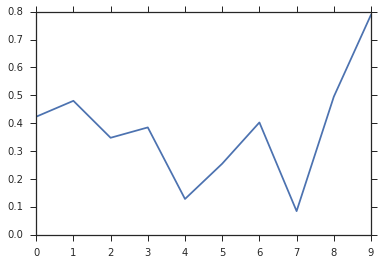

In [483]:
plot(random.rand(10))

# IPython magics are like super-commands

### Most important:

`%pylab inline`

* `from numpy import *`

* `from matplotlib.pyplot import *`

* All plots will show inline

* Doesn't work in regular python script, only in a notebook

# Figure control

In [415]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


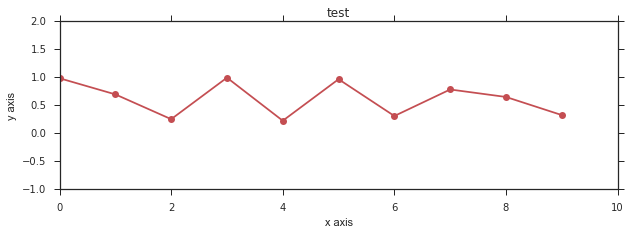

In [387]:
figure(figsize=[10,3])
plot(random.rand(10),'or-')
title("test")
xlim(0,10)
ylim(-1,2)
xlabel("x axis")
ylabel("y axis")

# Matplotlib 3D

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = figure(figsize=[10,5])
ax = Axes3D(fig)
x=arange(-10,10,0.1)
y=arange(-10,10,0.1)
x,y = meshgrid(x,y)
z = cos(x) + sin(y)

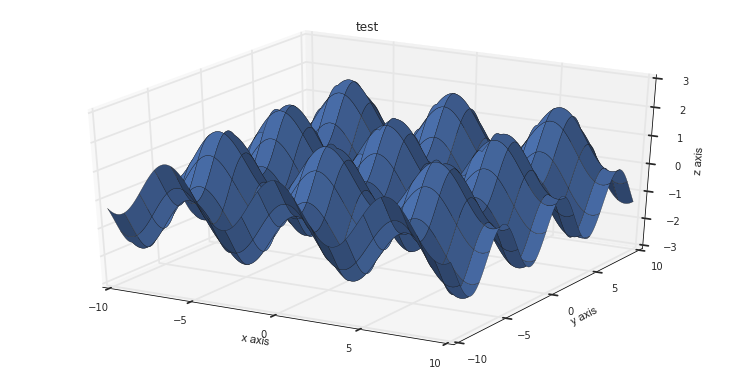

In [390]:
ax.plot_surface(x,y,z)
title("test")
xlim(-10,10)
ylim(-10,10)
ax.set_zlim3d([-3,3])
xlabel("x axis")
ylabel("y axis")
ax.set_zlabel("z axis")

# Vispy 3D

In [281]:
import vispy_surf as vp
x = arange(-3,3,0.01)
y = arange(-3,3,0.01)
def f(x,y):
    r = sqrt(x**2+y**2)
    return sinc(r)

vp.surf(x,y,f)

# Sympy

In [282]:
import sympy as sym
sym.init_printing()

In [283]:
def f(x): return x*sym.sin(1/x)

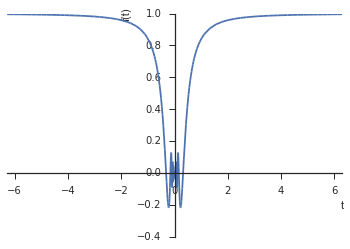

In [286]:
t = sym.var('t')
sym.plot(f(t),(t,-2*sym.pi,2*sym.pi))

 # Calculus with Sympy

In [287]:
sym.limit(f(t),t,0)

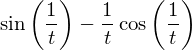

In [288]:
sym.diff(f(t),t)

In [289]:
sym.integrate(f(t),(t,-1,1))

# Algebra with Sympy

In [290]:
expr=(1+t)*(1-t) + sym.sin(sym.acos(t))
expr

In [291]:
sym.simplify(expr)

# Scipy

## Special Functions

In [292]:
from scipy.special import erf,j0,gamma

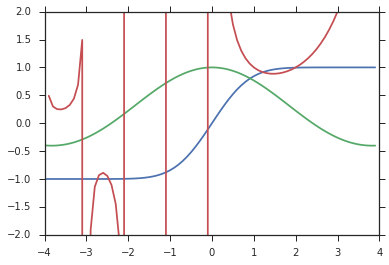

In [293]:
x=arange(-4,4,0.1)
plot(x,erf(x),x,j0(x),x,gamma(x));
axis([-4,4,-2,2]);

# ODE Solvers

In [294]:
### Comparable to ode45 / ode15s, depending on mode
from scipy.integrate import odeint,ode

#### <center> 2nd Order ODE
<sub>
\begin{align}
y''(x) &= y^2 + y' \\
y(0) &= 1 \\
y'(0) &= 0 \\
x & \in [0,5]
\end{align}
</sub>
</center>

In [304]:
# Declare the model
def rhs(y, t):
    dy=[0,0]
    dy[0] = y[1]
    dy[1] = y[0]**2 - y[1]
    return dy
time = arange(0,1,1e-4)
yinit = array([1.0, 0.0])

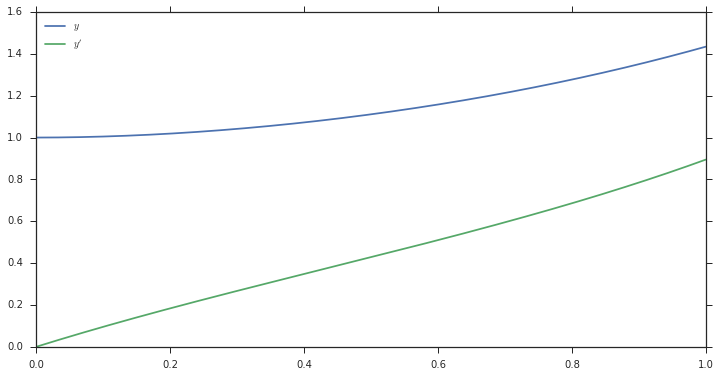

In [392]:
y = odeint(rhs, yinit, time)

figure(figsize=[12,6])
plot(time,y[:,0])
plot(time,y[:,1])
legend(["$y$","$y'$"],loc='best');

```
#Stiff (almost)
dt=1e-4
ode15s = ode(rhs)
ode15s.set_integrator('vode', method='bdf', order=15, nsteps=3000)
ode15s.set_initial_value(yinit,time[0])
i=0
while ode15s.successful() and ode15s.t <= time[-1]:
    y[i,:] = ode15s.integrate(ode15s.t+dt)
```

# Pandas

In [298]:
import pandas as pd
pd.options.display.max_rows=10

In [299]:
names = ['Frank','Maddy','Claire']
attributes = ['height','weight','shirt size','nose length','typing speed','grade']
data = random.randint(10,20,[3,6])
df = pd.DataFrame(data,index=names,columns=attributes)

In [485]:
df

,height,weight,shirt size,nose length,typing speed,grade
Frank,17,13,10,14,13,18
Maddy,11,10,18,19,10,10
Claire,13,11,18,19,14,16


# Seaborn

In [301]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [302]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


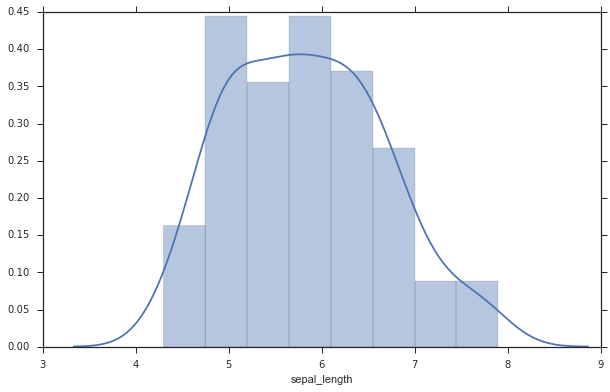

In [419]:
figure(figsize=[10,6])
sns.distplot(iris['sepal_length']);

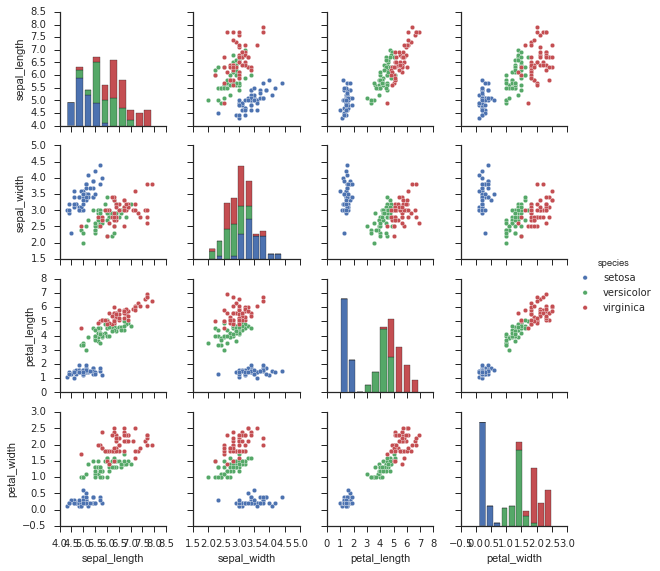

In [420]:
sns.pairplot(iris,hue='species',size=2);

# <center>Try it out!</center>

# Installing Python

* Google "Miniconda" & install

* Open a command prompt

Run:  
- `conda install jupyter numpy matplotlib scipy sympy pandas`